In [1]:
import re
from operator import add
import findspark 
findspark.init('C:\MyProgz\spark-2.2.0-bin-hadoop2.7')
import pyspark
sc = pyspark.SparkContext(appName="Learn RDD")

In [2]:
f_in = sc.textFile('file:///Users/Tran/git/_learning/learning_spark/data/report.txt')
f_in.cache()
print('number of lines in file: %s' % f_in.count())
chars = f_in.map(lambda s: len(s)).take(5)
print('length of first 5 lines: %s' % chars)
charSamples = f_in.map(lambda s: len(s)).takeSample(True, 5)
print('length of first 5 sampled lines: %s' % charSamples)
totalChars = f_in.map(lambda s: len(s)).reduce(lambda a, b: a + b)
print('number of chars in file: %s' % totalChars)
words = f_in.flatMap(lambda s: re.split(' ', s.lower().strip())).filter(lambda w: len(w) > 5)
print('total number of words with length > 5: %s' % words.count())

number of lines in file: 204
length of first 5 lines: [16, 11, 561, 1, 1]
length of first 5 sampled lines: [101, 96, 84, 44, 2]
number of chars in file: 8713
total number of words with length > 5: 469


In [3]:
wordCount = words.map(lambda w: (w, 1)).reduceByKey(add)
print('Words with count > 4: %s' % wordCount.filter(lambda (w, c): c > 4).collect())
countWord = wordCount.map(lambda x: (x[1],x[0])).sortByKey(False).cache()
print('Words sorted by counts: %s ' % countWord.take(20))

Words with count > 4: [(u'review', 5), (u'business', 6), (u'select', 5), (u'tables', 5), (u'voldemort', 9), (u'discuss', 6), (u'performance', 5), (u'queries', 6), (u'computer', 5), (u'optimize', 8), (u'script', 7)]
Words sorted by counts: [(9, u'voldemort'), (8, u'optimize'), (7, u'script'), (6, u'business'), (6, u'discuss'), (6, u'queries'), (5, u'review'), (5, u'select'), (5, u'tables'), (5, u'performance'), (5, u'computer'), (4, u'implement'), (4, u'applicable,'), (4, u'compute'), (4, u'different'), (4, u'problems'), (4, u'before'), (4, u'number'), (4, u'b.business_id'), (4, u'strategies')] 


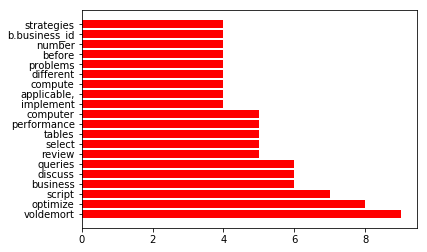

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline
def histogram(words):
    count = map(lambda x: x[0], words)
    word = map(lambda x: x[1], words)
    plt.barh(range(len(count)), count, color='red')
    plt.yticks(range(len(count)), word)
histogram(countWord.take(20))

In [5]:
countWord.saveAsTextFile('file:///Users/Tran/git/_learning/learning_spark/data/out/report_out_txt')
countWord.saveAsSequenceFile('file:///Users/Tran/git/_learning/learning_spark/data/out/report_out_seq')

In [6]:
import csv, StringIO

def loadRecords(line):
    input = StringIO.StringIO(line)
    reader = csv.DictReader(input, fieldnames=["dispatching_base_number", "date", "active_vehicles", "trips"])
    return reader.next()

def writeRecords(records):
    output = StringIO.StringIO()
    writer = csv.DictWriter(output, fieldnames=["dispatching_base_number", "date", "active_vehicles", "trips"])
    for record in records:
        writer.writerow(record)
    return [output.getvalue()]

f_in = sc.textFile('file:///Users/Tran/git/_learning/learning_spark/data/uber.csv')
records  = f_in.map(loadRecords)
records.mapPartitions(writeRecords).saveAsTextFile('file:///Users/Tran/git/_learning/learning_spark/data/out/uber_out_txt.csv')


In [ ]:
print('DONE!')